In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
!pip install prettytable

from prettytable import PrettyTable

# Create a table
table = PrettyTable()

# Define table headers
table.field_names = ["Name", "Age", "Department"]

# Add rows to the table
table.add_row(["Alice", 28, "HR"])
table.add_row(["Bob", 32, "Finance"])
table.add_row(["Carol", 25, "Marketing"])

# Print the table
print(table)

# Redirect the printed output to a file
with open('output_table.txt', 'w') as f:
    f.write(str(table))

|  Name | Age | Department |
+-------+-----+------------+
| Alice |  28 |     HR     |
|  Bob  |  32 |  Finance   |
| Carol |  25 | Marketing  |
+-------+-----+------------+



In [6]:
!pip install pandas

In [9]:
!pip install faker

import pandas as pd
import random
from faker import Faker

# Create a Faker instance for generating fake data
fake = Faker()

# Set a seed for reproducibility
random.seed(42)

# Create a dictionary to store the data
data = {
    'id': [i+1 for i in range(1000)],
    'first_name': [fake.first_name() for _ in range(1000)],
    'last_name': [fake.last_name() for _ in range(1000)],
    'gender': [random.choice(['Male', 'Female']) for _ in range(1000)],
    'department': [random.choice(['HR', 'Finance', 'Marketing', 'IT']) for _ in range(1000)],
    'salary': [random.randint(30000, 100000) for _ in range(1000)],
    'region': [fake.city() for _ in range(1000)],
    'hire_date': [fake.date_this_decade() for _ in range(1000)],
    'email': [fake.email() for _ in range(1000)]
}

# Create a DataFrame from the dictionary
employees = pd.DataFrame(data)

# Display the first few rows of the DataFrame
employees.head()

                                              0.0/1.7 MB ? eta -:--:--
     --------------------                     0.9/1.7 MB 27.4 MB/s eta 0:00:01
     ------------------------                 1.1/1.7 MB 13.4 MB/s eta 0:00:01
     ---------------------------------------- 1.7/1.7 MB 13.6 MB/s eta 0:00:00


,id,first_name,last_name,gender,department,salary,region,hire_date,email
0,1,Steven,Jackson,Male,HR,54101,Georgeborough,2021-11-21,qcastro@example.com
1,2,Joy,Ward,Male,Finance,92065,Alanborough,2020-10-20,jessica02@example.org
2,3,James,Vega,Female,HR,61584,Port Gabrielle,2022-07-05,reevesmichael@example.com
3,4,Rhonda,Park,Male,HR,59536,New Patrickshire,2020-06-07,charlesoliver@example.org
4,5,Robert,Acosta,Male,Marketing,69418,Smithberg,2022-08-25,williamdavis@example.com


In [10]:
## Average Salary by Department

average_salary_by_department = employees.groupby('department')['salary'].mean()
print(average_salary_by_department)


department
Finance      64442.295833
HR           64871.821577
IT           65892.418972
Marketing    63372.699248
Name: salary, dtype: float64


In [13]:
## Gender Distribution

gender_distribution = employees['gender'].value_counts()
print(gender_distribution)


Female    514
Male      486
Name: gender, dtype: int64


In [12]:
## Top Regions by Employee Count

top_regions = employees['region'].value_counts().head(10)
print(top_regions)


Smithshire            3
New Susan             3
Michaelmouth          3
East William          2
Port Elizabethstad    2
Lake Dawnbury         2
North David           2
Rodgersborough        2
North William         2
Lindseyshire          2
Name: region, dtype: int64


In [14]:
## Salary Summmary Statistics

salary_summary = employees['salary'].describe()
print(salary_summary)


count     1000.000000
mean     64628.180000
std      19893.037316
min      30088.000000
25%      47436.500000
50%      64986.000000
75%      81286.250000
max      99951.000000
Name: salary, dtype: float64


In [15]:
## Number of Employees Hired Each Year

employees['hire_year'] = pd.to_datetime(employees['hire_date']).dt.year
hire_count_by_year = employees['hire_year'].value_counts().sort_index()
print(hire_count_by_year)


2020    266
2021    281
2022    268
2023    185
Name: hire_year, dtype: int64


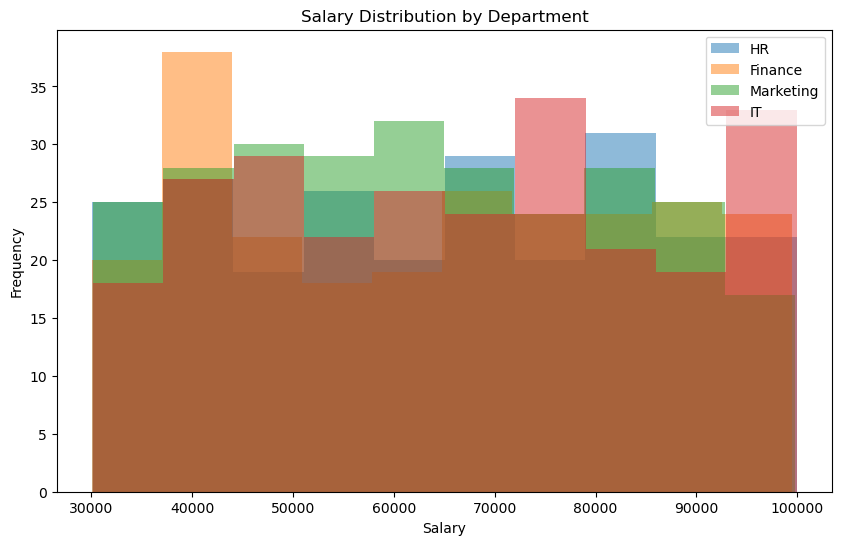

In [16]:
## Departmental Salary Distribution

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for department in employees['department'].unique():
    subset = employees[employees['department'] == department]
    plt.hist(subset['salary'], alpha=0.5, label=department)

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary Distribution by Department')
plt.legend()
plt.show()


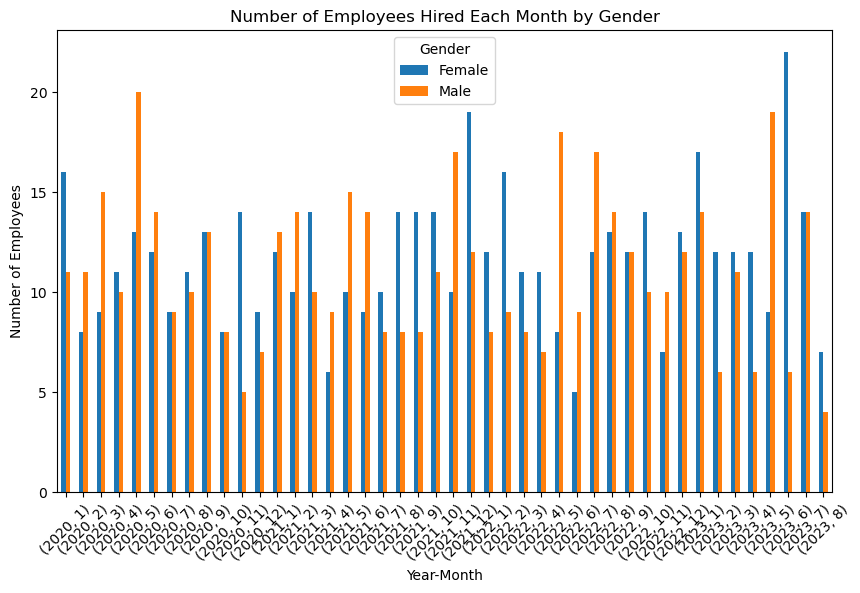

In [17]:
import matplotlib.pyplot as plt

# Convert hire_date to datetime
employees['hire_date'] = pd.to_datetime(employees['hire_date'])

# Extract year and month from hire_date
employees['hire_year'] = employees['hire_date'].dt.year
employees['hire_month'] = employees['hire_date'].dt.month

# Group by year, month, and gender and count the number of employees
hires_by_month_gender = employees.groupby(['hire_year', 'hire_month', 'gender'])['id'].count().reset_index()

# Pivot the table to have gender as columns and months as rows
pivot_table = hires_by_month_gender.pivot(index=['hire_year', 'hire_month'], columns='gender', values='id').fillna(0)

# Plot the data in a column chart
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year-Month')
plt.ylabel('Number of Employees')
plt.title('Number of Employees Hired Each Month by Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()


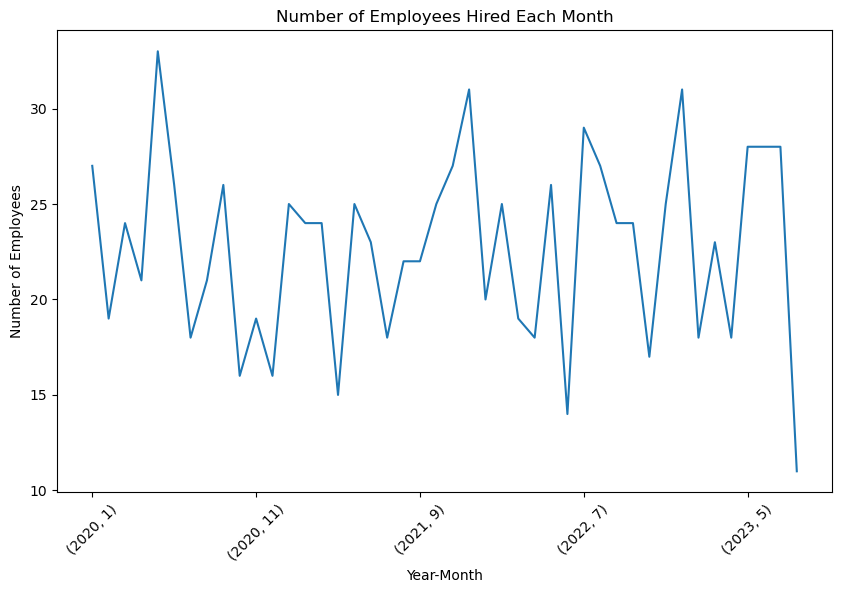

In [18]:
import matplotlib.pyplot as plt

# Convert hire_date to datetime
employees['hire_date'] = pd.to_datetime(employees['hire_date'])

# Extract year and month from hire_date
employees['hire_year'] = employees['hire_date'].dt.year
employees['hire_month'] = employees['hire_date'].dt.month

# Group by year and month and count the number of employees
hires_by_month_year = employees.groupby(['hire_year', 'hire_month'])['id'].count()

# Plot the data in a line chart
hires_by_month_year.plot(kind='line', figsize=(10, 6))
plt.xlabel('Year-Month')
plt.ylabel('Number of Employees')
plt.title('Number of Employees Hired Each Month')
plt.xticks(rotation=45)
plt.show()


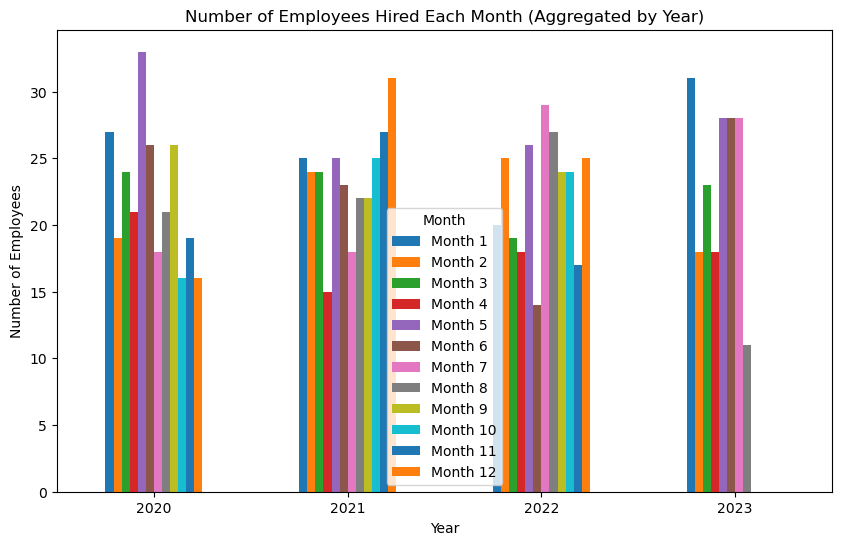

In [19]:
import matplotlib.pyplot as plt

# Convert hire_date to datetime
employees['hire_date'] = pd.to_datetime(employees['hire_date'])

# Extract year and month from hire_date
employees['hire_year'] = employees['hire_date'].dt.year
employees['hire_month'] = employees['hire_date'].dt.month

# Group by year and month and count the number of employees
hires_by_month_year = employees.groupby(['hire_year', 'hire_month'])['id'].count().reset_index()

# Pivot the table to have months as columns and years as rows
pivot_table = hires_by_month_year.pivot(index='hire_year', columns='hire_month', values='id').fillna(0)

# Plot the data in a column chart
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.title('Number of Employees Hired Each Month (Aggregated by Year)')
plt.legend(title='Month', labels=[f'Month {i}' for i in range(1, 13)])
plt.xticks(rotation=0)
plt.show()


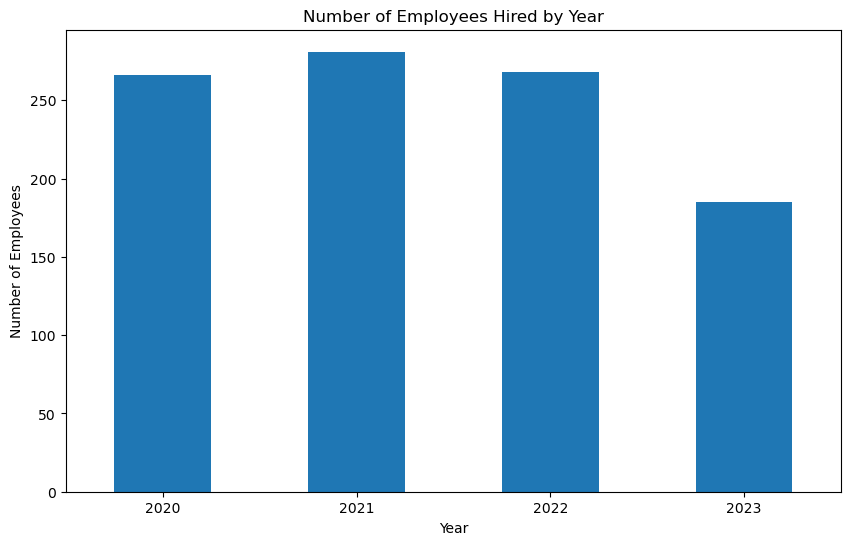

In [20]:
import matplotlib.pyplot as plt

# Convert hire_date to datetime
employees['hire_date'] = pd.to_datetime(employees['hire_date'])

# Extract year from hire_date
employees['hire_year'] = employees['hire_date'].dt.year

# Group by year and count the number of employees
hires_by_year = employees.groupby('hire_year')['id'].count()

# Plot the data in a column chart
hires_by_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.title('Number of Employees Hired by Year')
plt.xticks(rotation=0)
plt.show()


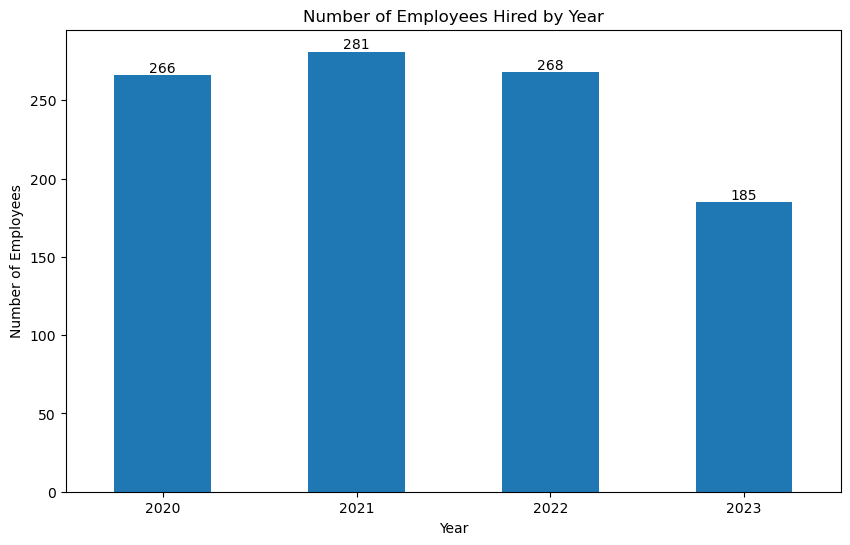

In [21]:
import matplotlib.pyplot as plt

# Convert hire_date to datetime
employees['hire_date'] = pd.to_datetime(employees['hire_date'])

# Extract year from hire_date
employees['hire_year'] = employees['hire_date'].dt.year

# Group by year and count the number of employees
hires_by_year = employees.groupby('hire_year')['id'].count()

# Plot the data in a column chart
ax = hires_by_year.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Employees')
plt.title('Number of Employees Hired by Year')
plt.xticks(rotation=0)

# Add data labels above each column
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()


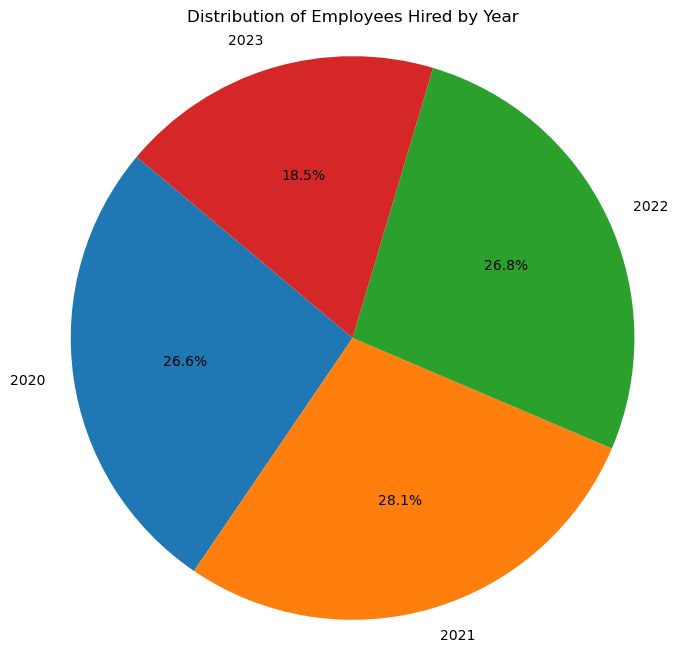

In [22]:
import matplotlib.pyplot as plt

# Convert hire_date to datetime
employees['hire_date'] = pd.to_datetime(employees['hire_date'])

# Extract year from hire_date
employees['hire_year'] = employees['hire_date'].dt.year

# Group by year and count the number of employees
hires_by_year = employees.groupby('hire_year')['id'].count()

# Plot the data in a pie chart
plt.figure(figsize=(8, 8))
plt.pie(hires_by_year, labels=hires_by_year.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Employees Hired by Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [23]:
import pandas as pd

# Convert hire_date to datetime
employees['hire_date'] = pd.to_datetime(employees['hire_date'])

# Extract year and month from hire_date
employees['hire_year'] = employees['hire_date'].dt.year
employees['hire_month'] = employees['hire_date'].dt.month

# Filter for year 2020
hires_2020 = employees[employees['hire_year'] == 2020]

# Group by month and calculate total hires
total_hires_per_month = hires_2020.groupby('hire_month')['id'].count()

# Calculate the difference between consecutive months
monthly_difference = total_hires_per_month.diff().fillna(0)

# Create a DataFrame to display the results
result_table = pd.DataFrame({
    'Month': monthly_difference.index,
    'Difference': monthly_difference.values
})

# Display the table
print(result_table)


    Month  Difference
0       1         0.0
1       2        -8.0
2       3         5.0
3       4        -3.0
4       5        12.0
5       6        -7.0
6       7        -8.0
7       8         3.0
8       9         5.0
9      10       -10.0
10     11         3.0
11     12        -3.0
